# 판다스 Pandas

시리즈 클래스와 데이터 프레임 클래스를 제공하여 데이터를 다루기 위한 패키지


In [1]:
# 판다스 패키지 임포트  
import pandas as pd

In [2]:
# 버전 확인 
pd.__version__

'1.4.2'

In [3]:
# 시리즈 클래스 생성, name으로 인덱스 이름 설정
sr = pd.Series([3,2,3,4,7], name='apple')
type(sr)

pandas.core.series.Series

In [4]:
sr

0    3
1    2
2    3
3    4
4    7
Name: apple, dtype: int64

In [5]:
sr2 = pd.Series([5,6,3,1,2], name='banana')
sr2

0    5
1    6
2    3
3    1
4    2
Name: banana, dtype: int64

In [6]:
sr3 = pd.Series([4,1,3,6,2], name='mango', index=['A','B','C','D','E'])
sr3

A    4
B    1
C    3
D    6
E    2
Name: mango, dtype: int64

In [7]:
# 시리즈 결합하여 데이터 프레임 형태로 변환 1
df = pd.concat([sr,sr2],axis=1)
df

,apple,banana
0,3,5
1,2,6
2,3,3
3,4,1
4,7,2


In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
# 시리즈 결합하여 데이터 프레임 형태로 변환 2
pd.concat([sr,sr3], axis=1)

,apple,mango
0,3.0,NaN
1,2.0,NaN
2,3.0,NaN
3,4.0,NaN
4,7.0,NaN
A,NaN,4.0
B,NaN,1.0
C,NaN,3.0
D,NaN,6.0
E,NaN,2.0


In [10]:
# 리스트로 데이터 프레임 만들기 1
data = [
    ['john','tom','alice'],
     [3,4,5],
     [True, False, True]
]

pd.DataFrame(data)   # 데이터 프레임 형태에 맞지 않음

,0,1,2
0,john,tom,alice
1,3,4,5
2,True,False,True


In [11]:
# 리스트로 데이터 프레임 만들기 2
data2 = [
    ['john',3,True],
     ['tom',4,False],
     ['alice', 5, True]
]

pd.DataFrame(data2)

# pd.DataFrame(data).T

,0,1,2
0,john,3,True
1,tom,4,False
2,alice,5,True


In [12]:
# 딕셔너리형태로 데이터프레임 만들기
data = {
    'name' : ['John','Tom','Alice'],
    'point' : [3,5,4],
    'pass' : [False, True, False]
}

df=pd.DataFrame(data)
df

,name,point,pass
0,John,3,False
1,Tom,5,True
2,Alice,4,False


In [13]:
df.shape

(3, 3)

In [14]:
df.columns

Index(['name', 'point', 'pass'], dtype='object')

In [15]:
# 컬럼 이름 설정
data = [
     ['john',3,True],
     ['tom',4,False],
     ['alice', 5, True]
]

df_x=pd.DataFrame(data)
df_x.columns = ["name","point",'pass']
df

,name,point,pass
0,John,3,False
1,Tom,5,True
2,Alice,4,False


In [16]:
# 특정 컬럼명 변경(딕셔너리 활용)
df_x=df_x.rename(columns={'point':'Score'})
df_x

,name,Score,pass
0,john,3,True
1,tom,4,False
2,alice,5,True


### Titanic 데이터

In [17]:
# 데이터 불러오기
titanic = pd.read_csv('./dataset/titanic.csv')

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic.info()
# non-null count : 결측치(missing value) 확인
# dtype 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
titanic.isna()  # 결측치 확인, T/F로 나타냄

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
sr = titanic.isna().sum(axis=0)
sr

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

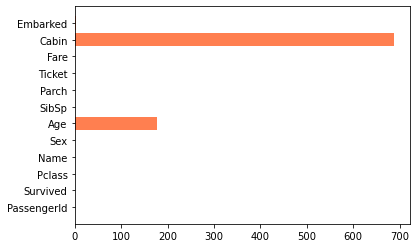

In [30]:
import matplotlib.pyplot as plt

plt.barh(sr.index, sr.values,  color = 'coral')
plt.show()

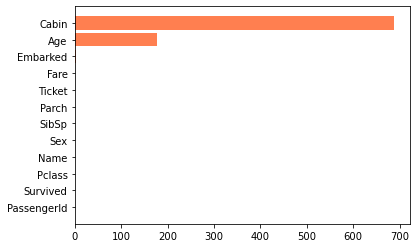

In [29]:
sr1 = sr.sort_values()
plt.barh(sr1.index, sr1.values, color = 'coral')
plt.show()

### one-hot encoding

범주형 데이터 간에 순서가 없는 경우 원-핫 인코딩을 진행해주는 게 좋음

- 타이타닉 데이터에서 Embarked 데이터 원-핫 인코딩 진행


In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
titanic['Embarked'].unique()

# titanic.Embarked.unique()   ->  컬럼 이름이 띄어쓰기 없는 경우 이런 표현도 가능함

array(['S', 'C', 'Q', nan], dtype=object)

In [34]:
type(titanic['Embarked'])  

pandas.core.series.Series

In [35]:
# 시리즈를 get_dummies 함수로 원-핫 인코딩 진행
pd.get_dummies(titanic['Embarked'])  

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [36]:
# 여러 컬럼을 가져올 때는 리스트 형태 사용
titanic[["Embarked", "Pclass"]]  # 타입은 데이터 프레임

,Embarked,Pclass
0,S,3
1,C,1
2,S,3
3,S,1
4,S,3
...,...,...
886,S,2
887,S,1
888,S,3
889,C,1


---
#### 슬라이싱 방법

- iloc : 조건 지정은 못함, 어디에서 어디까지 가져올지 설정
- loc : 조건 지정하여 행 출력

In [41]:
titanic.iloc[0:5, 0:3]  # 0~5번 행, 0~3번 컬럼 가져오기

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


In [40]:
titanic.loc[titanic['Embarked']=="C", :]   # Embarked가 C인 모든 행 가져오기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [42]:
titanic.loc[(titanic['Embarked']=="C") & (titanic['Survived']==1), :]   # C에 탑승했고 살아남은 사람 모든 행 출력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [47]:
titanic[0:1]  # 숫자만 지정하면 행만 가져옴

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [49]:
titanic.sort_index(axis=0,ascending=False)   # sort_incex : index를 기준으로 정렬 / ascending=False : 내림차순 정렬

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [51]:
titanic.sort_values(by=["Age","Fare"])    # sort_values(by=) 특정 컬럼을 기준으로 정렬

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S


In [53]:
# 컬럼 추가하기

titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]    # SibSp와 Parch 컬럼을 더해서 새로운 컬럼 생성
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [56]:
# 컬럼 삭제하기

titanic.drop(["SibSp", "Parch"],axis=1, inplace=True)   # 원본은 삭제되지 않음, inplace = True를 입력하면 원본도 수정됨

# titanic = titanic.drop(["SibSp", "Parch"],axis=1)

In [57]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [58]:
titanic.loc[titanic['Age'] < 1.0, "Cabin"] = "None"   # loc를 사용해 Cabin 컬럼에 있는 특정 조건에 맞는 데이터를 none으로 변경

In [61]:
titanic.Cabin.unique()   # 원본 데이터에 None으로 바뀐지 확인
# titanic.loc[titanic['Cabin']=='None', :]  # loc으로 조건을 줘서 바뀐 행 확인

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'None', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60',
       'E101', 'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7',
       'C49', 'F4', 'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78',
       'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7',
       'A19', 'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C

In [65]:
df = titanic.select_dtypes(include=["float64"])  # select_dtypes : 특정 타입이 있는 데이터 가져올 때 사용
df

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [68]:
def f1(x):
    # print(type(x))
    return x.max() - x.min()

df.apply(f1)   # x에 데이터 프레임을 입력

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Age      79.5800
Fare    512.3292
dtype: float64

In [71]:
def f2(x):
    if x > 30:
        return 0
    else:
        return 1
df["Age"].apply(f2)   # x에 시리즈로 입력

0      1
1      0
2      1
3      0
4      0
      ..
886    1
887    1
888    1
889    1
890    0
Name: Age, Length: 891, dtype: int64

In [72]:
df["Age2"] = df["Age"].apply(f2)   # 새로운 컬럼을 생성해서 f2함수가 적용된 값을 입력

In [73]:
df.head()

,Age,Fare,Age2
0,22.0,7.2500,1
1,38.0,71.2833,0
2,26.0,7.9250,1
3,35.0,53.1000,0
4,35.0,8.0500,0


In [75]:
# 성별 컬럼을 범주형으로 변경
def f3(x):
    if x == "male":
        return 1
    else:
        return 0
    
titanic.Sex = titanic.Sex.apply(f3)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,NaN,S,0


In [76]:
# 람다 함수 활용해서 survived 값 변경(*숫자->문자)
titanic["Survived"] = titanic["Survived"].apply(lambda x: "saved" if x == 1 else 'lost')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,lost,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,NaN,S,1
1,2,saved,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,C,1
2,3,saved,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,saved,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,C123,S,1
4,5,lost,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,NaN,S,0


In [77]:
# map : 문자열을 숫자로 인코딩 할 때 주로 사용 (숫자->문자)
titanic["Survived"] = titanic["Survived"].map({"saved":0,"lost":1})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,1,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,NaN,S,1
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,C,1
2,3,0,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,C123,S,1
4,5,1,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,NaN,S,0


In [78]:
titanic.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Ticket           0
Fare             0
Cabin          681
Embarked         2
FamilySize       0
dtype: int64

---
#### 결측값 처리

In [79]:
x = titanic.dropna()  # na가 하나라도 있는 행 삭제, 데이터 손실 문제 발생
x.shape

(189, 11)

In [80]:
x = titanic.fillna(0)   # na값을 0으로 변경, 컬럼의 특징을 고려하지 못하는 문제 발생
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,1,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,0,S,1
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,C,1
2,3,0,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,0,S,0
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,C123,S,1
4,5,1,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,0,S,0


In [82]:
# 데이터 대세에 크게 영향을 주지 않는 값을 na값을 채워주는 게 좋음
# 평균 or 중간값 

titanic['Age'] = titanic["Age"].fillna(titanic.Age.mean())
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
Ticket           0
Fare             0
Cabin          681
Embarked         2
FamilySize       0
dtype: int64

In [84]:
titanic["Embarked"].value_counts()   # value_counts() : 각 범주형의 개수 확인

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [87]:
# Embarked의 결측값 2개는 값이 가장 많은 S에 넣어야 대세에 지장을 주지 않음
titanic['Embarked'] = titanic['Embarked'].fillna("S")
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [92]:
titanic.drop(["Cabin"],axis=1,inplace=True)

KeyError: "['Cabin'] not found in axis"

In [93]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
dtype: int64

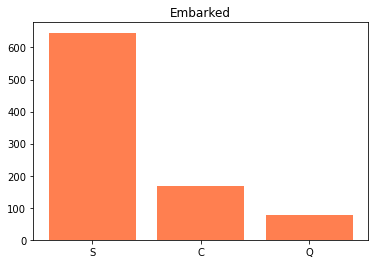

In [94]:
import matplotlib.pyplot as plt

sr = titanic["Embarked"].value_counts()

plt.bar(sr.index, sr.values, color='coral')
plt.title('Embarked')
plt.show()

In [95]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,1,1,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,S,1
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C,1
2,3,0,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,S,0
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,S,1
4,5,1,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,S,0


In [102]:
# 남성 승객 나이 평균
titanic[titanic["Sex"]==1].Age.mean()

30.50582424304206

In [103]:
# 여성 승객 나이 평균
titanic[titanic["Sex"]==0].Age.mean()

28.216730048707397

---
### GroupBy

In [104]:
data = {
    "city":["Busan","Busan","Busan","Busan","Seoul","Seoul","Seoul"],
    "fruit":["Apple",'Orange','Banana','Banana','Apple','Apple','Banana'],
    "price":[100,200,250,300,150,200,400],
    "quantity":[1,2,3,4,5,6,7]
}

df = pd.DataFrame(data)
df

,city,fruit,price,quantity
0,Busan,Apple,100,1
1,Busan,Orange,200,2
2,Busan,Banana,250,3
3,Busan,Banana,300,4
4,Seoul,Apple,150,5
5,Seoul,Apple,200,6
6,Seoul,Banana,400,7


In [106]:
df.groupby("city").price.mean()  # city로 그룹을 만들고 그룹별 price의 평균을 구할 수 있음

city
Busan    212.5
Seoul    250.0
Name: price, dtype: float64

In [111]:
df.groupby(['city','fruit']).mean()

price  quantity
city  fruit                  
Busan Apple   100.0       1.0
      Banana  275.0       3.5
      Orange  200.0       2.0
Seoul Apple   175.0       5.5
      Banana  400.0       7.0

In [112]:
# 남/여 나이 평균
titanic.groupby('Sex').Age.mean()

Sex
0    28.216730
1    30.505824
Name: Age, dtype: float64

In [114]:
# 남/여 사망률
titanic.groupby('Sex').Survived.mean()

Sex
0    0.257962
1    0.811092
Name: Survived, dtype: float64

In [115]:
# Pclass별 사망률
titanic.groupby('Pclass').Survived.mean()

Pclass
1    0.370370
2    0.527174
3    0.757637
Name: Survived, dtype: float64

---

#### 연속형 데이터를 범주형으로 변경

In [117]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,1,1,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,S,1
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C,1
2,3,0,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,S,0
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,S,1
4,5,1,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,S,0


In [119]:
# 나이를 연령대로 분류
titanic["AgeClass"] = pd.cut(titanic['Age'], 3, labels=['child','young','old'])   # cut : Age 컬럼을 3등분으로 나누고 각 등분의 labels 설정
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,AgeClass
0,1,1,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,S,1,child
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C,1,young
2,3,0,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,S,0,child
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,S,1,young
4,5,1,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,S,0,young


In [120]:
titanic["AgeClass"].value_counts()

young    522
child    319
old       50
Name: AgeClass, dtype: int64

In [121]:
titanic = titanic.drop(['Age'],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Fare,Embarked,FamilySize,AgeClass
0,1,1,3,"Braund, Mr. Owen Harris",1,A/5 21171,7.2500,S,1,child
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,PC 17599,71.2833,C,1,young
2,3,0,3,"Heikkinen, Miss. Laina",0,STON/O2. 3101282,7.9250,S,0,child
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,113803,53.1000,S,1,young
4,5,1,3,"Allen, Mr. William Henry",1,373450,8.0500,S,0,young


---

### 문자열 처리

In [126]:
import numpy as np

data = {
    "Dave":"dave@gmail.com",
    "Steve":"steve@naver.com",
    "Rob":"rob@gmail.com",
    "wes" :"wes@hotmail.com"
}

sr = pd.Series(data)  # 딕셔너리 -> 시리즈
sr

Dave      dave@gmail.com
Steve    steve@naver.com
Rob        rob@gmail.com
wes      wes@hotmail.com
dtype: object

In [127]:
sr.str.contains("gmail")

Dave      True
Steve    False
Rob       True
wes      False
dtype: bool

In [134]:
sr.str.findall("gmail")

Dave     [gmail]
Steve         []
Rob      [gmail]
wes           []
dtype: object

---

### 시계열 데이터


In [137]:
data = np.random.rand(1000,3)
data.shape

(1000, 3)

In [140]:
df = pd.DataFrame(data, index=pd.date_range('1/1/2022',periods=1000), columns=['A','B','C'])     # date_range : 2022.1.1 부터 1000일 간 데이터 생성
df.head(10)

,A,B,C
2022-01-01,0.689923,0.809359,0.974862
2022-01-02,0.559340,0.375979,0.478763
2022-01-03,0.486798,0.820593,0.570894
2022-01-04,0.595136,0.547923,0.573421
2022-01-05,0.825141,0.111884,0.261605
2022-01-06,0.051797,0.387723,0.485890
2022-01-07,0.706632,0.627107,0.316583
2022-01-08,0.362670,0.255801,0.414690
2022-01-09,0.267659,0.219016,0.588501
2022-01-10,0.849731,0.969500,0.404938
